<a href="https://colab.research.google.com/github/vaddehema/MNIST-data/blob/main/MNIST_DATA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras

In [5]:
(X_train, y_train), (X_test, y_test)=tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [6]:
X_train.shape,y_train.shape, "***************" , X_test.shape,y_test.shape

((60000, 28, 28), (60000,), '***************', (10000, 28, 28), (10000,))

In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [8]:
y_train[0]

9

In [9]:
class_labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt",	"Sneaker","Bag","Ankle boot" ]

In [10]:
class_labels

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

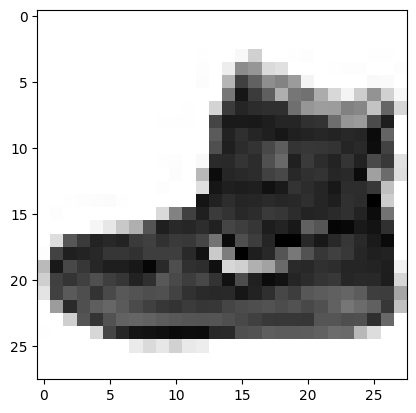

In [11]:
plt.imshow(X_train[0],cmap='Greys')

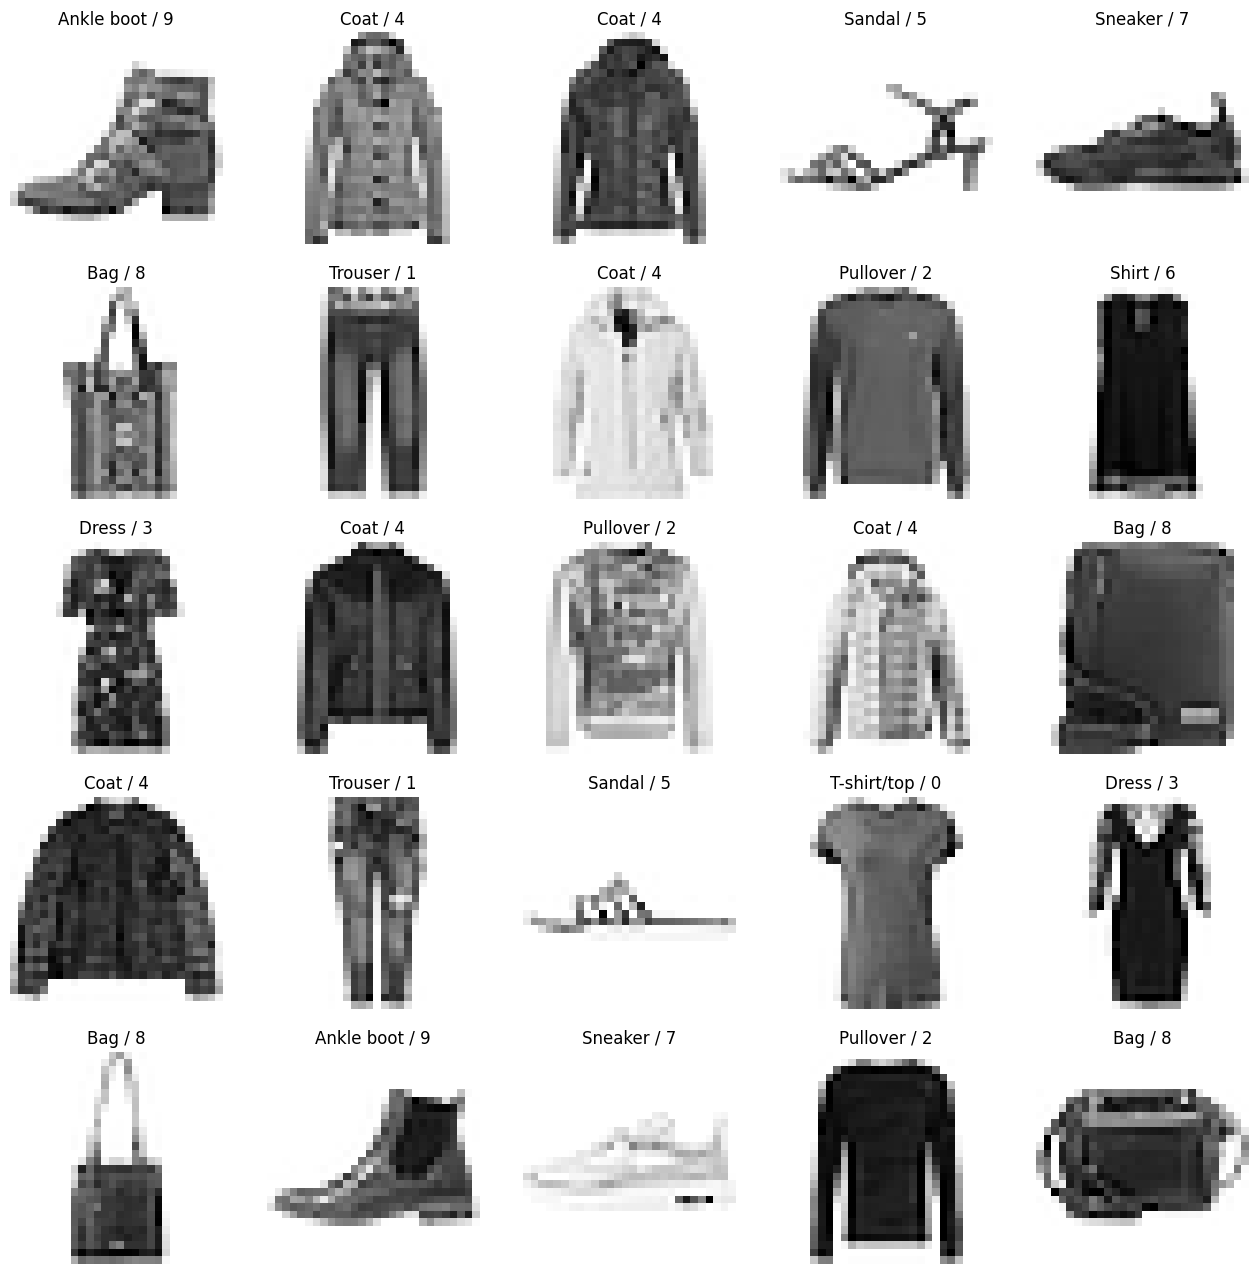

In [12]:
plt.figure(figsize=(16,16))

j=1
for  i in np.random.randint(0,1000,25):
  plt.subplot(5,5,j);j+=1
  plt.imshow(X_train[i],cmap='Greys')
  plt.axis('off')
  plt.title('{} / {}'.format(class_labels[y_train[i]],y_train[i]))

In [13]:
X_train.ndim

3

In [15]:
X_train = np.expand_dims(X_train,-1)

In [16]:
X_train.ndim

5

In [17]:
X_test=np.expand_dims(X_test,-1)

In [18]:
X_train = X_train/255
X_test= X_test/255

In [19]:
from sklearn.model_selection import  train_test_split
X_train,X_Validation,y_train,y_Validation=train_test_split(X_train,y_train,test_size=0.2,random_state=2020)

In [20]:
X_train.shape,X_Validation.shape,y_train.shape,y_Validation.shape

((48000, 28, 28, 1, 1), (12000, 28, 28, 1, 1), (48000,), (12000,))

In [22]:
############  CNN MODEL ############

In [21]:
model=keras.models.Sequential([
                         keras.layers.Conv2D(filters=32,kernel_size=3,strides=(1,1),padding='valid',activation='relu',input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128,activation='relu'),
                         keras.layers.Dense(units=10,activation='softmax')
])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
__________________________________________________

In [24]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [25]:
model.fit(X_train,y_train,epochs=10,batch_size=512,verbose=1,validation_data=(X_Validation,y_Validation))

Epoch 1/10
94/94 [==============================] - 29s 301ms/step - loss: 0.6437 - accuracy: 0.7772 - val_loss: 0.4367 - val_accuracy: 0.8525
Epoch 2/10
94/94 [==============================] - 29s 307ms/step - loss: 0.3865 - accuracy: 0.8649 - val_loss: 0.3721 - val_accuracy: 0.8712
Epoch 3/10
94/94 [==============================] - 27s 290ms/step - loss: 0.3366 - accuracy: 0.8810 - val_loss: 0.3395 - val_accuracy: 0.8788
Epoch 4/10
94/94 [==============================] - 30s 313ms/step - loss: 0.3025 - accuracy: 0.8931 - val_loss: 0.3173 - val_accuracy: 0.8887
Epoch 5/10
94/94 [==============================] - 28s 299ms/step - loss: 0.2826 - accuracy: 0.8998 - val_loss: 0.3079 - val_accuracy: 0.8920
Epoch 6/10
94/94 [==============================] - 29s 305ms/step - loss: 0.2680 - accuracy: 0.9050 - val_loss: 0.2892 - val_accuracy: 0.8987
Epoch 7/10
94/94 [==============================] - 27s 290ms/step - loss: 0.2537 - accuracy: 0.9094 - val_loss: 0.2923 - val_accuracy: 0.8975

In [26]:
y_pred = model.predict(X_test)
y_pred.round(2)

313/313 [==============================] - 3s 9ms/step


array([[0.  , 0.  , 0.  , ..., 0.01, 0.  , 0.99],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.99, 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.01, ..., 0.17, 0.07, 0.01]], dtype=float32)

In [27]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [28]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.2741 - accuracy: 0.9012


[0.2741236686706543, 0.901199996471405]

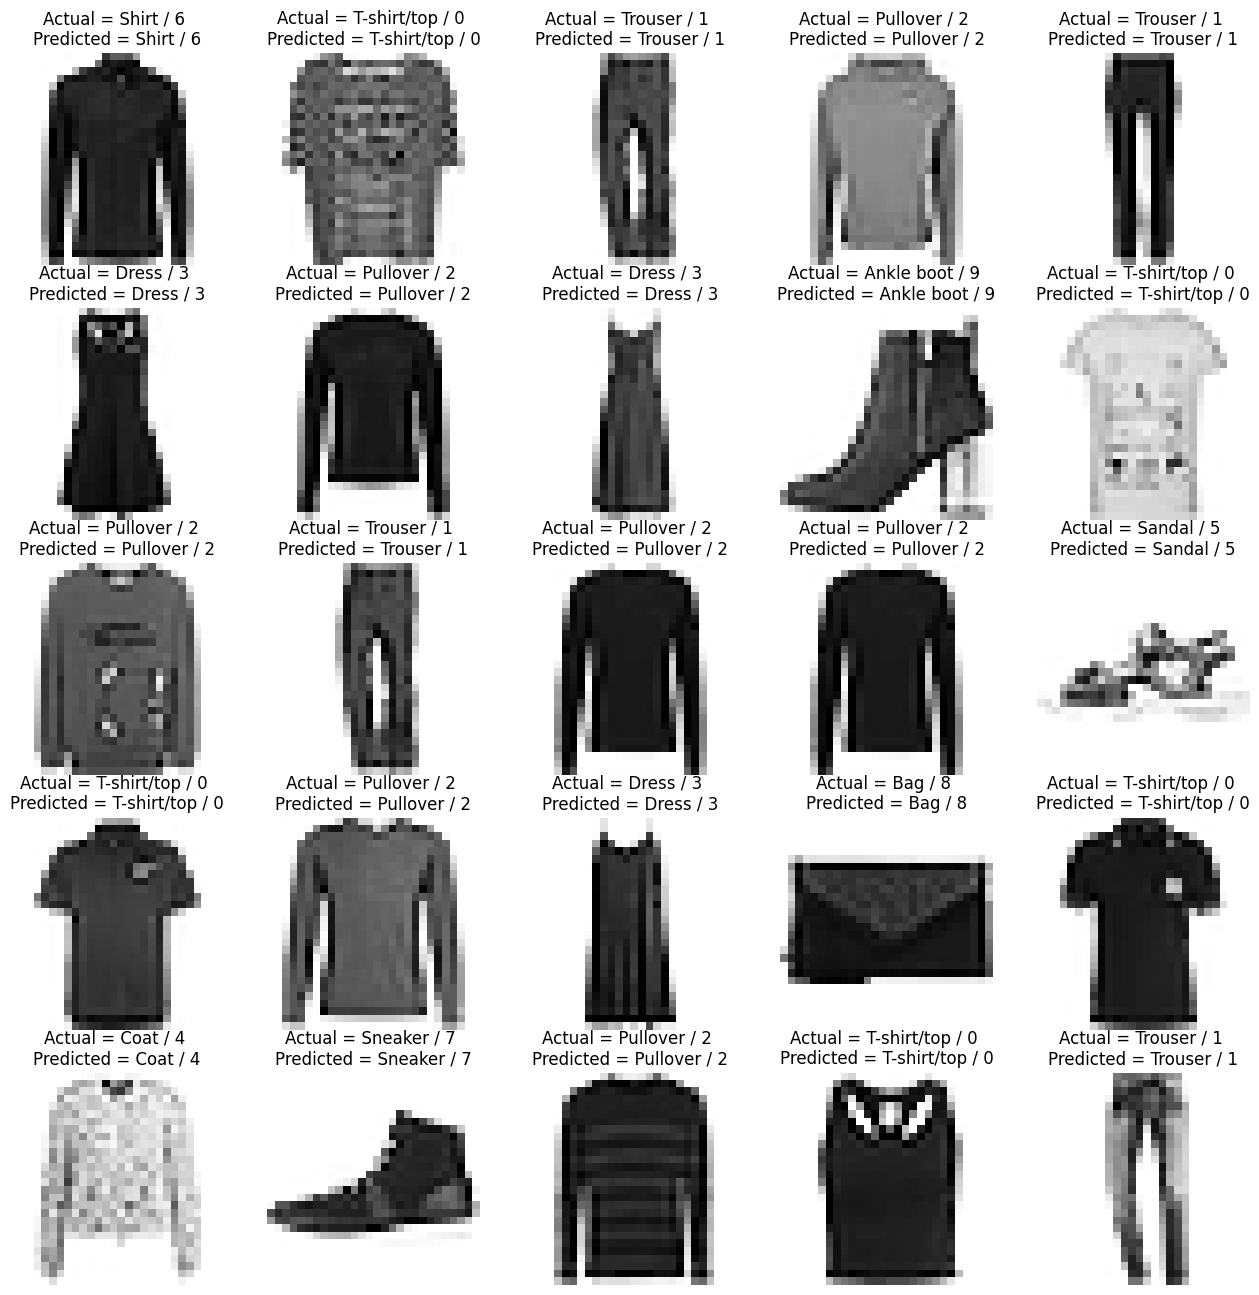

In [29]:
plt.figure(figsize=(16,16))
 
j=1
for i in np.random.randint(0, 1000,25):
  plt.subplot(5,5, j); j+=1
  plt.imshow(X_test[i].reshape(28,28), cmap = 'Greys')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')

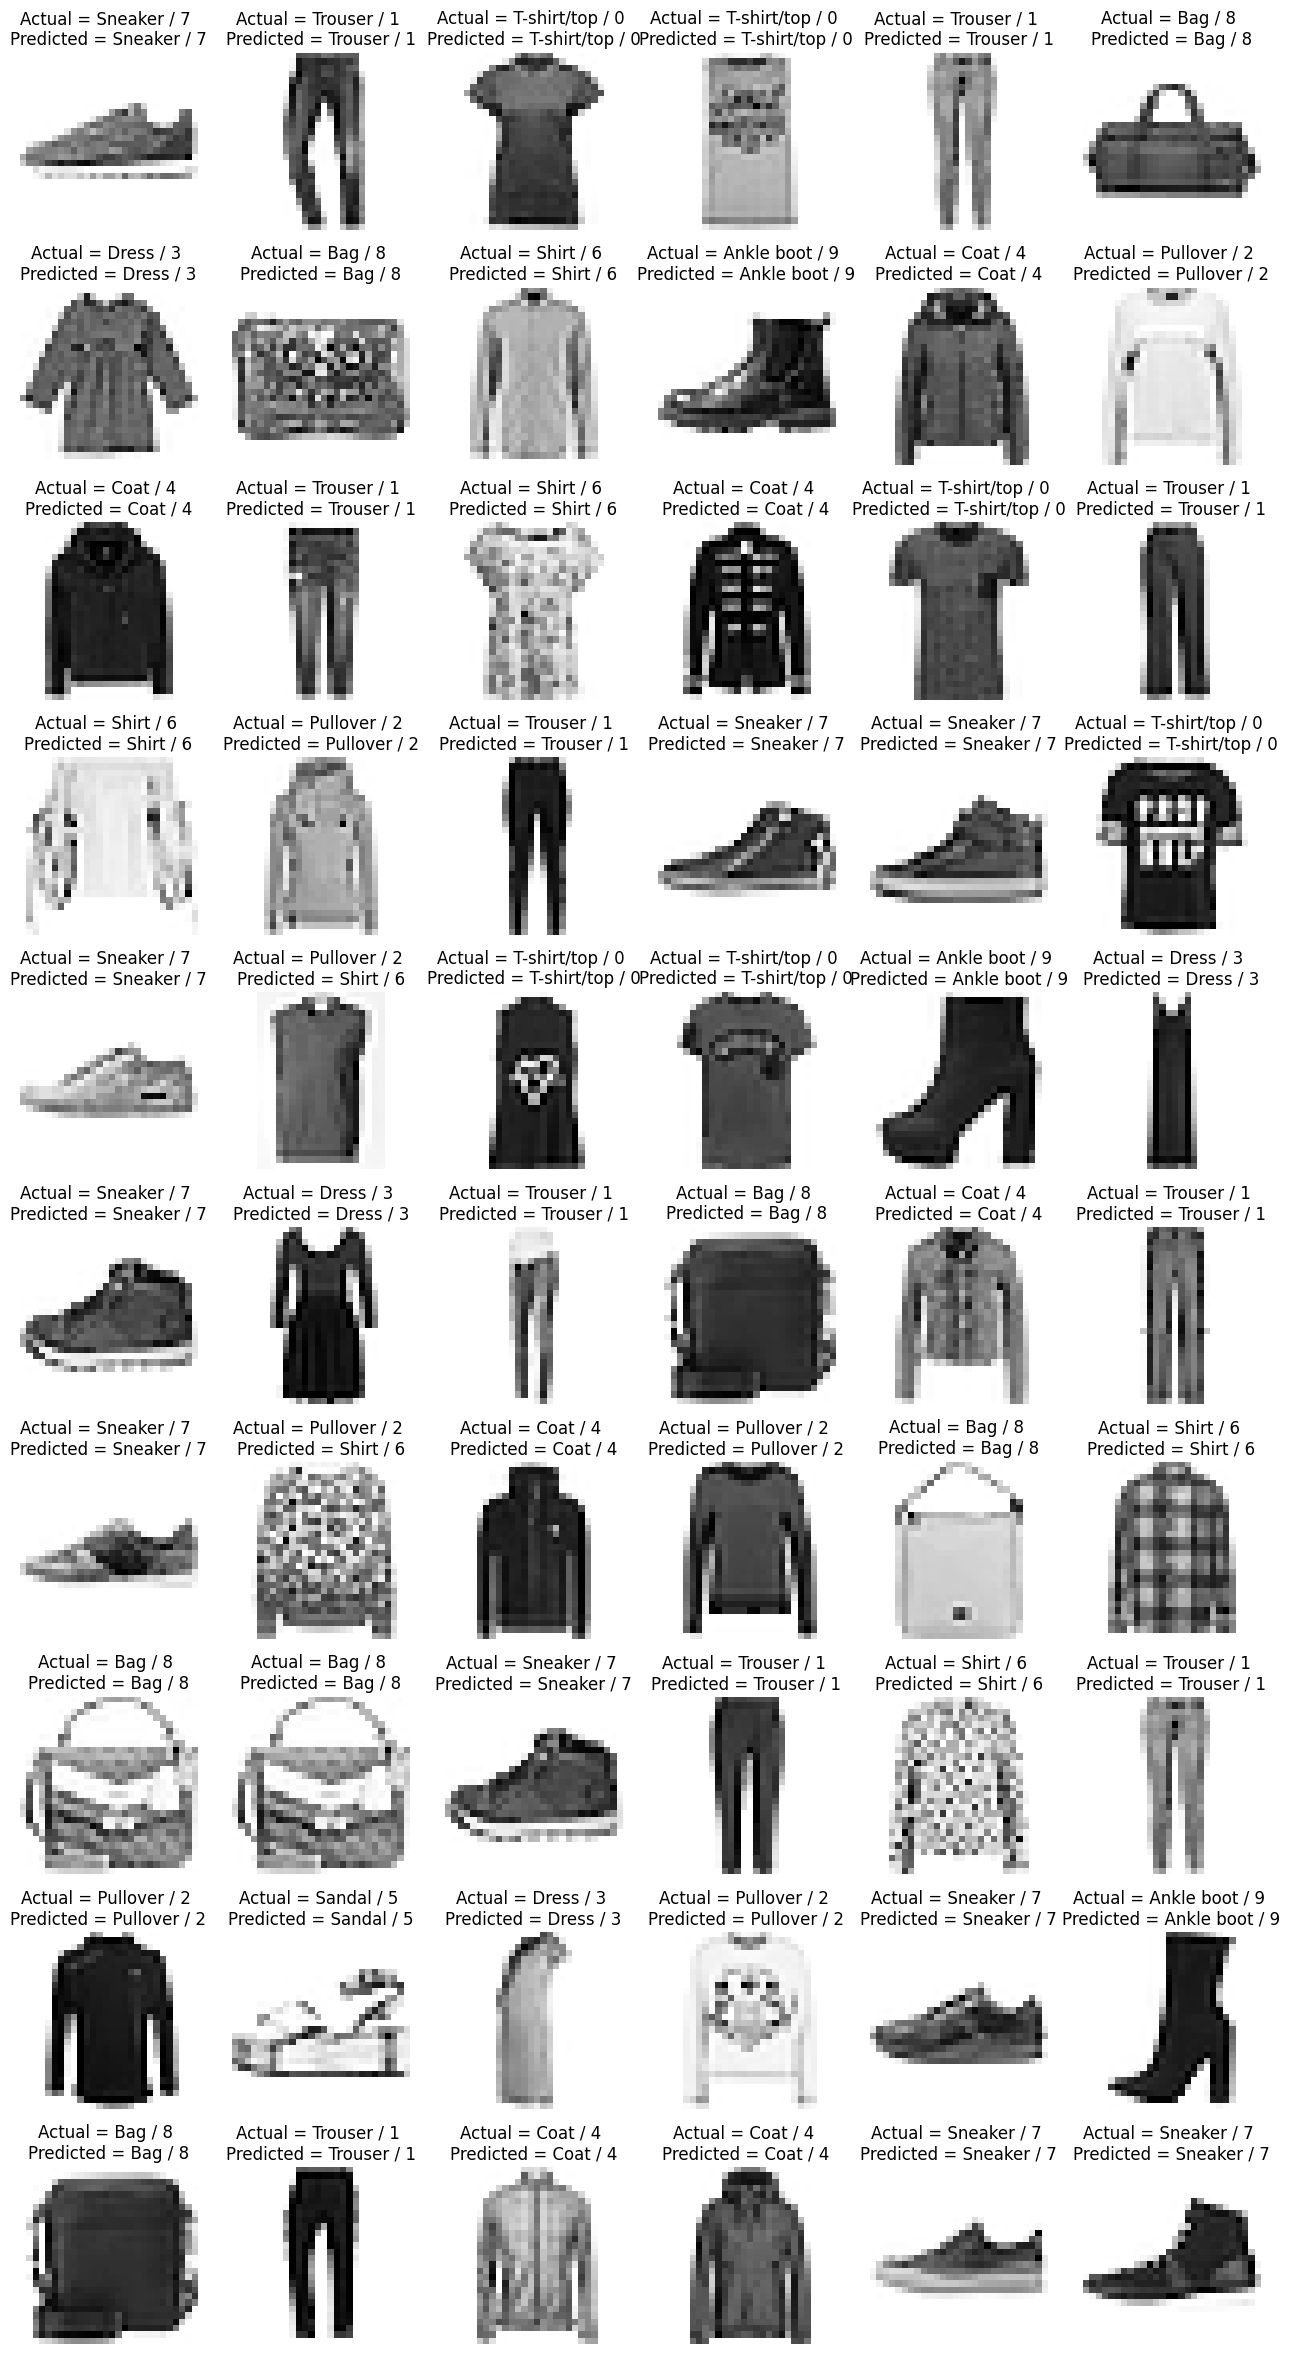

In [30]:
plt.figure(figsize=(16,30))
 
j=1
for i in np.random.randint(0, 1000,60):
  plt.subplot(10,6, j); j+=1
  plt.imshow(X_test[i].reshape(28,28), cmap = 'Greys')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')

In [ ]:
############### CONFUSION MATRIX ################

In [31]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(16,9))
y_pred_labels = [ np.argmax(label) for label in y_pred ]
cm = confusion_matrix(y_test, y_pred_labels)

<Figure size 1600x900 with 0 Axes>

              precision    recall  f1-score   support

 T-shirt/top       0.85      0.84      0.84      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.83      0.86      0.84      1000
       Dress       0.85      0.94      0.89      1000
        Coat       0.85      0.85      0.85      1000
      Sandal       0.98      0.97      0.97      1000
       Shirt       0.77      0.68      0.73      1000
     Sneaker       0.95      0.96      0.95      1000
         Bag       0.97      0.98      0.97      1000
  Ankle boot       0.96      0.96      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



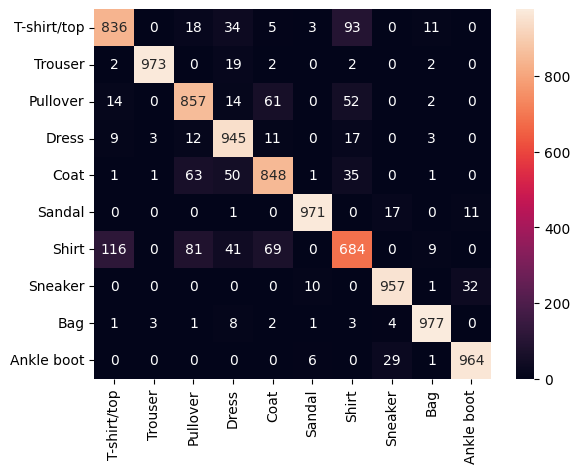

In [32]:
sns.heatmap(cm, annot=True, fmt='d',xticklabels=class_labels, yticklabels=class_labels)
 
from sklearn.metrics import classification_report
cr= classification_report(y_test, y_pred_labels, target_names=class_labels)
print(cr)

In [33]:
model.save('fashion_mnist_cnn_model.h5')

In [34]:
cnn_model2 = keras.models.Sequential([
                         keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dense(units=10, activation='softmax')
                         ])
 
# complie the model
cnn_model2.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])
 
#Train the Model
cnn_model2.fit(X_train, y_train, epochs=20, batch_size=512, verbose=1, validation_data=(X_Validation, y_Validation))
 
cnn_model2.save('fashion_mnist_cnn_model2.h5')
 
"""######## very complex model"""
 
#Building CNN model
cnn_model3 = keras.models.Sequential([
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=128, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.5),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.25),                        
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.10),                         
                         keras.layers.Dense(units=10, activation='softmax')
                         ])
 
# complie the model
cnn_model3.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])
 
#Train the Model
cnn_model3.fit(X_train, y_train, epochs=50, batch_size=512, verbose=1, validation_data=(X_Validation, y_Validation))
 
cnn_model3.save('fashion_mnist_cnn_model3.h5')
 
cnn_model3.evaluate(X_test, y_test)

Epoch 1/20
94/94 [==============================] - 45s 469ms/step - loss: 1.0586 - accuracy: 0.6085 - val_loss: 0.5826 - val_accuracy: 0.7737
Epoch 2/20
94/94 [==============================] - 30s 314ms/step - loss: 0.5554 - accuracy: 0.7913 - val_loss: 0.4811 - val_accuracy: 0.8238
Epoch 3/20
94/94 [==============================] - 33s 352ms/step - loss: 0.4586 - accuracy: 0.8302 - val_loss: 0.4020 - val_accuracy: 0.8509
Epoch 4/20
94/94 [==============================] - 33s 350ms/step - loss: 0.4014 - accuracy: 0.8533 - val_loss: 0.3591 - val_accuracy: 0.8659
Epoch 5/20
94/94 [==============================] - 34s 358ms/step - loss: 0.3620 - accuracy: 0.8679 - val_loss: 0.3331 - val_accuracy: 0.8760
Epoch 6/20
94/94 [==============================] - 31s 330ms/step - loss: 0.3362 - accuracy: 0.8769 - val_loss: 0.3181 - val_accuracy: 0.8819
Epoch 7/20
94/94 [==============================] - 32s 343ms/step - loss: 0.3178 - accuracy: 0.8830 - val_loss: 0.3080 - val_accuracy: 0.8878

[0.4524523913860321, 0.9014999866485596]